In [18]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 1.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 4.0 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.4 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 8.3 MB/s eta 0:00:00


In [47]:
#import modelling packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
import lightgbm as lgb

In [4]:
df = pd.read_excel("../Data/dataproject2024.xlsx")

In [5]:
df.head(5)

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),Pred_default (y_hat),PD,Group
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0,0,0.024480,1
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1,0,0.331661,0
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0,0,0.187505,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0,0,0.035441,1
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1,0,0.340883,0


In [7]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7430 non-null   int64  
 1   Job tenure            7430 non-null   int64  
 2   Age                   7430 non-null   int64  
 3   Car price             7430 non-null   int64  
 4   Funding amount        7430 non-null   int64  
 5   Down payment          7430 non-null   int64  
 6   Loan duration         7430 non-null   int64  
 7   Monthly payment       7430 non-null   float64
 8   Credit event          7430 non-null   int64  
 9   Married               7430 non-null   int64  
 10  Homeowner             7430 non-null   int64  
 11  Default (y)           7430 non-null   int64  
 12  Pred_default (y_hat)  7430 non-null   int64  
 13  PD                    7430 non-null   float64
 14  Group                 7430 non-null   int64  
dtypes: float64(2), int64(

Index(['ID', 'Job tenure', 'Age', 'Car price', 'Funding amount',
       'Down payment', 'Loan duration', 'Monthly payment', 'Credit event',
       'Married', 'Homeowner', 'Default (y)', 'Pred_default (y_hat)', 'PD',
       'Group'],
      dtype='object')

In [11]:
x = ['ID', 'Job tenure', 'Age', 'Car price', 'Funding amount',
       'Down payment', 'Loan duration', 'Monthly payment', 'Credit event',
       'Married', 'Homeowner']
y = ['Default (y)']

df_1 = x+y

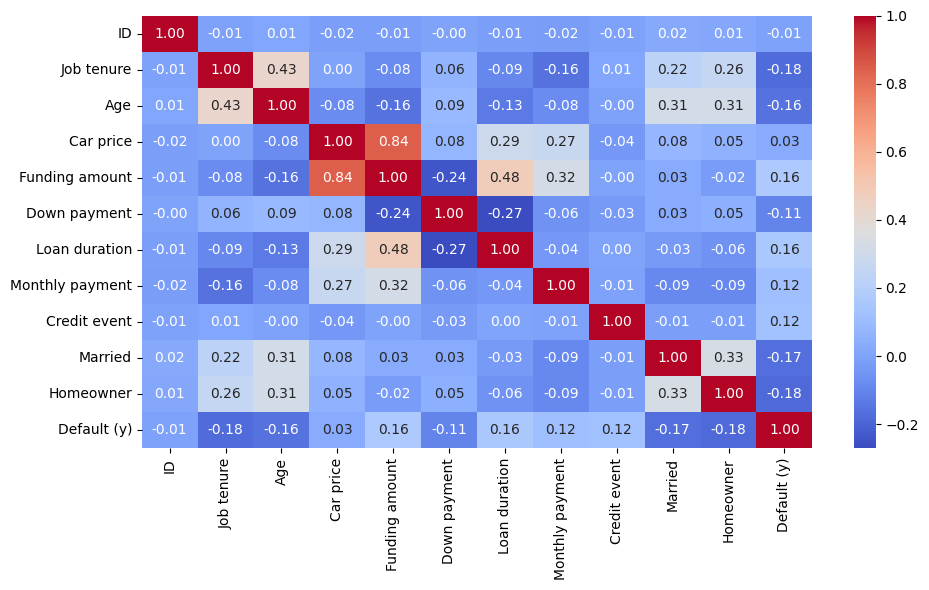

In [20]:
corr = df_1.corr()

# Increase figure size
plt.figure(figsize=(10, 6))

# Plot the heatmap with adjusted annotation size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})

# Show the plot
plt.tight_layout()  # Adjusts the layout to make room for the annotations
plt.show()

In [25]:
df_1.columns

Index(['ID', 'Job tenure', 'Age', 'Car price', 'Funding amount',
       'Down payment', 'Loan duration', 'Monthly payment', 'Credit event',
       'Married', 'Homeowner', 'Default (y)'],
      dtype='object')

In [24]:
df_1.head()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y)
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1


In [26]:
col_num = ['ID', 'Job tenure', 'Age', 'Car price', 'Funding amount',
       'Down payment', 'Loan duration', 'Monthly payment']

col_cat = ['Credit event', 'Married', 'Homeowner']

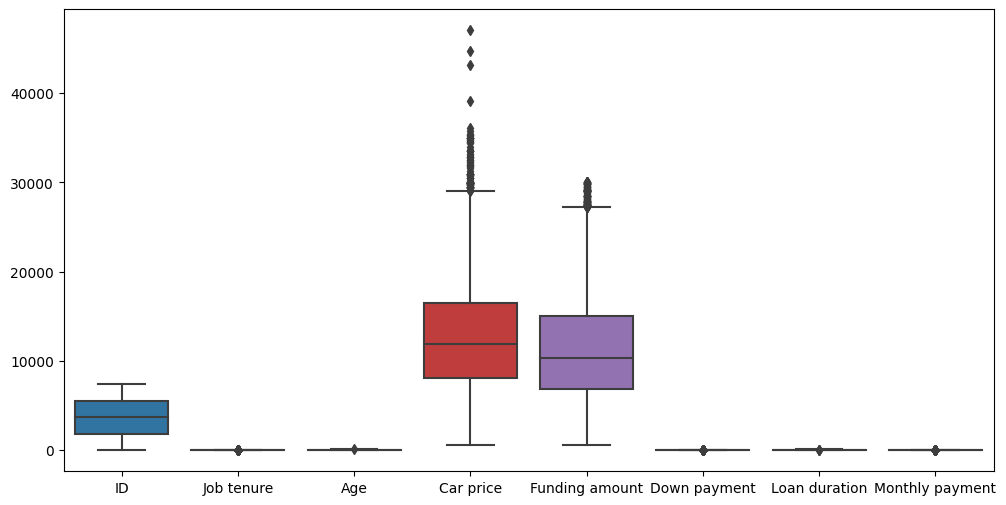

In [34]:
# Boxplot for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(df_1[col_num])

plt.show()


In [39]:
df_1[y].value_counts()

Default (y)
0              5945
1              1485
Name: count, dtype: int64

In [40]:
# Handle categorical variables using Label Encoding
# Apply Label Encoding to the categorical columns
label_encoders = {}
for column in col_num:
    le = LabelEncoder()
    df_1[column] = le.fit_transform(df_1[column])
    label_encoders[column] = le 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_1[x], df_1[y], test_size=0.2, random_state=42)

C:\Users\ZQili\AppData\Local\Temp\ipykernel_10324\1090551839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[column] = le.fit_transform(df_1[column])
C:\Users\ZQili\AppData\Local\Temp\ipykernel_10324\1090551839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[column] = le.fit_transform(df_1[column])
C:\Users\ZQili\AppData\Local\Temp\ipykernel_10324\1090551839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [56]:
# Initialize the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8041722745625841
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1205
           1       0.47      0.31      0.37       281

    accuracy                           0.80      1486
   macro avg       0.66      0.61      0.63      1486
weighted avg       0.78      0.80      0.79      1486



d:\APP\lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [57]:
balanced_accuracy_score(y_test, y_pred)

0.6131908861357629

In [58]:


# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set the parameters for the model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
bst = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
ba = balanced_accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')
print(f'BA: {ba}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1204, number of negative: 4740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 5944, number of used features: 11
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202557 -> initscore=-1.370388
[LightGBM] [Info] Start training from score -1.370388
Accuracy: 0.8209959623149394
BA: 0.6030980050501322


0.6030980050501322